# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from api_keys import weather_api_key 
from api_keys import geoapify_key
import pandas as pd
import os
import time

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
from api_keys import weather_api_key 

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"  # units=metric to get temperature in Celsius
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
Processing Record 2 of Set 1 | murun-kuren
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | houghton
Processing Record 6 of Set 1 | stephenville
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | dilling
Processing Record 11 of Set 1 | kirensk
Processing Record 12 of Set 1 | magadan
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | akjoujt
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | st. paul
Processing Record 19 of Set 1 | cambria
Processing Record 20 of Set 1 | waren
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2

Processing Record 39 of Set 4 | itacare
Processing Record 40 of Set 4 | pangani
Processing Record 41 of Set 4 | villa yapacani
Processing Record 42 of Set 4 | oruro
Processing Record 43 of Set 4 | zambezi
Processing Record 44 of Set 4 | bikenibeu village
Processing Record 45 of Set 4 | nkurenkuru
City not found. Skipping...
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | yreka
Processing Record 48 of Set 4 | hastings
Processing Record 49 of Set 4 | east london
Processing Record 0 of Set 5 | igarka
Processing Record 1 of Set 5 | kerikeri
Processing Record 2 of Set 5 | chifeng
Processing Record 3 of Set 5 | dalnegorsk
Processing Record 4 of Set 5 | kaa-khem
Processing Record 5 of Set 5 | gaalkacyo
Processing Record 6 of Set 5 | demre
Processing Record 7 of Set 5 | dem'yanovo
Processing Record 8 of Set 5 | obo
Processing Record 9 of Set 5 | artesia
Processing Record 10 of Set 5 | zhosaly
Processing Record 11 of Set 5 | saipan
Processing Record 12 of Set 5 | essa

City not found. Skipping...
Processing Record 29 of Set 8 | cudahy
Processing Record 30 of Set 8 | nikolayevsk-on-amure
Processing Record 31 of Set 8 | san clemente
Processing Record 32 of Set 8 | haiku-pauwela
Processing Record 33 of Set 8 | grand-bassam
Processing Record 34 of Set 8 | kayangel
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | yuzhno-kurilsk
Processing Record 37 of Set 8 | kingston
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | tabarka
Processing Record 40 of Set 8 | tynda
Processing Record 41 of Set 8 | sao martinho
Processing Record 42 of Set 8 | gadzhiyevo
Processing Record 43 of Set 8 | weyburn
Processing Record 44 of Set 8 | rio grande
Processing Record 45 of Set 8 | hede
Processing Record 46 of Set 8 | san luis de la loma
Processing Record 47 of Set 8 | elin pelin
Processing Record 48 of Set 8 | mokhsogollokh
Processing Record 49 of Set 8 | san pedro pochutla
Processing Record 0 of Set 9 | winburg
Processing 

Processing Record 17 of Set 12 | paciran
Processing Record 18 of Set 12 | ploneour-lanvern
Processing Record 19 of Set 12 | magong
Processing Record 20 of Set 12 | usinsk
Processing Record 21 of Set 12 | lhokseumawe
Processing Record 22 of Set 12 | nouadhibou
Processing Record 23 of Set 12 | ghazni
Processing Record 24 of Set 12 | purificacion
Processing Record 25 of Set 12 | san sebastian de la gomera
Processing Record 26 of Set 12 | ribeira brava
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | itoman
Processing Record 29 of Set 12 | pierre
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | champerico
Processing Record 32 of Set 12 | anastacio
Processing Record 33 of Set 12 | colonia
Processing Record 34 of Set 12 | hilden
Processing Record 35 of Set 12 | anzio
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | shache
Processing Record 38 of Set 12 | el calafate
Processing Record 39 of Set 12 | revda
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,27.93,82,45,6.45,PF,1709922697
1,murun-kuren,49.6342,100.1625,-13.58,87,66,0.86,MN,1709922698
2,west island,-12.1568,96.8225,27.99,89,100,4.63,CC,1709922698
3,mount gambier,-37.8333,140.7667,16.20,36,0,2.82,AU,1709922544
4,houghton,47.1219,-88.5690,4.82,68,0,0.89,US,1709922698


In [6]:
# Export the City_Data into a csv
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,27.93,82,45,6.45,PF,1709922697
1,murun-kuren,49.6342,100.1625,-13.58,87,66,0.86,MN,1709922698
2,west island,-12.1568,96.8225,27.99,89,100,4.63,CC,1709922698
3,mount gambier,-37.8333,140.7667,16.20,36,0,2.82,AU,1709922544
4,houghton,47.1219,-88.5690,4.82,68,0,0.89,US,1709922698


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

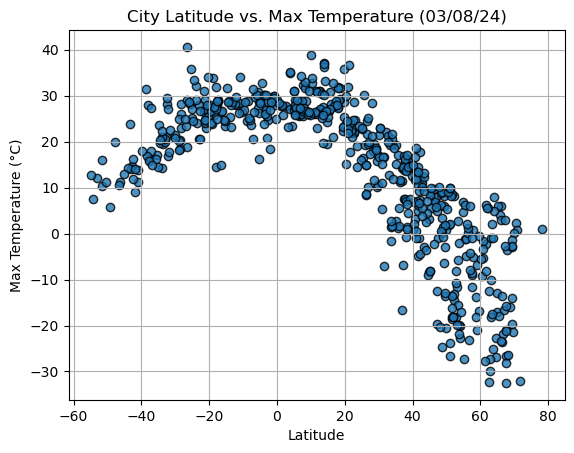

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

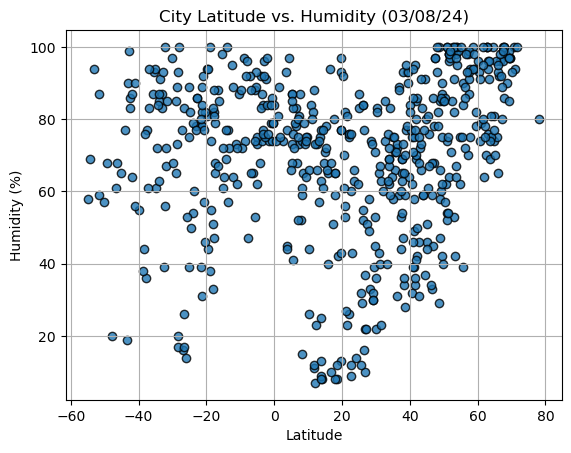

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

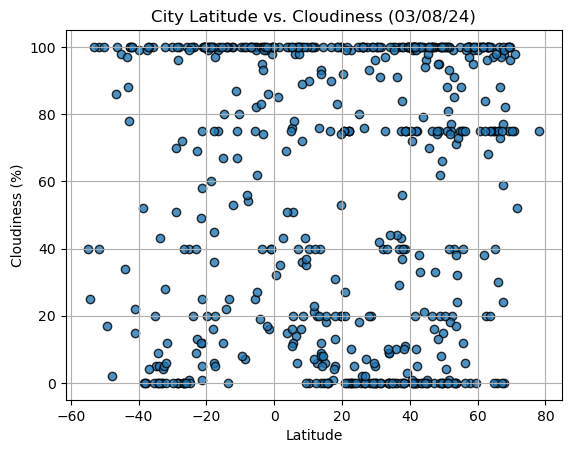

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

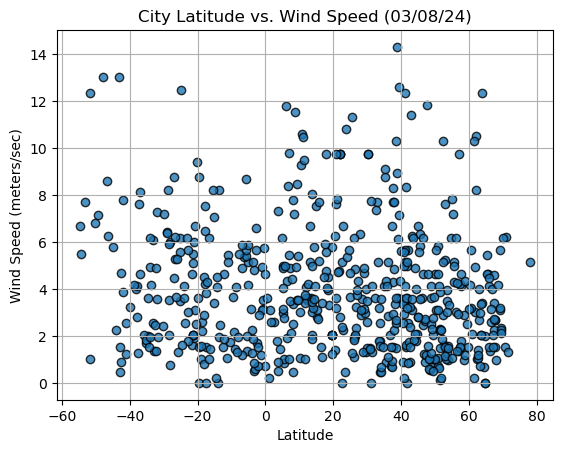

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed (meters/sec)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    """
    Create a scatter plot and linear regression line with the provided data.
    
    Parameters:
    - x_values: Series or array-like object for x-axis values.
    - y_values: Series or array-like object for y-axis values.
    - x_label: String for the x-axis label.
    - y_label: String for the y-axis label.
    - title: String for the plot title.
    - text_coordinates: Tuple (x, y) indicating where to place the regression line equation on the plot.
    """

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,murun-kuren,49.6342,100.1625,-13.58,87,66,0.86,MN,1709922698
4,houghton,47.1219,-88.5690,4.82,68,0,0.89,US,1709922698
5,stephenville,32.2207,-98.2023,22.09,60,40,3.60,US,1709922431
6,klyuchi,52.2667,79.1667,-14.44,98,77,2.88,RU,1709922699
9,dilling,12.0500,29.6500,26.76,7,100,4.07,SD,1709922700


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,27.93,82,45,6.45,PF,1709922697
2,west island,-12.1568,96.8225,27.99,89,100,4.63,CC,1709922698
3,mount gambier,-37.8333,140.7667,16.20,36,0,2.82,AU,1709922544
7,port-aux-francais,-49.3500,70.2167,5.71,68,17,7.16,TF,1709922699
8,atafu village,-8.5421,-172.5159,28.77,74,7,4.10,TK,1709922699


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.73


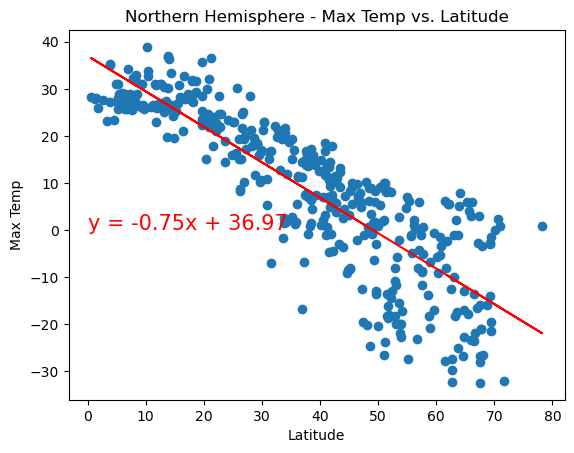

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
   
    # Calculate the linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    # Line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    plt.title(title)
    
    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Example: Linear regression on Northern Hemisphere for Max Temp vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (C)', 'Northern Hemisphere - Max Temp vs. Latitude', (0,0))


The r-squared is: 0.45


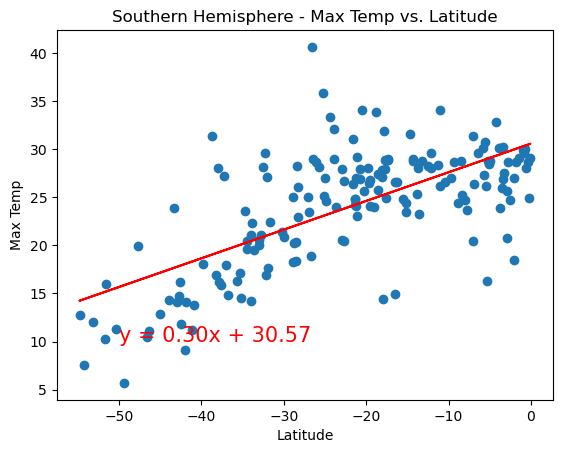

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (C)','Southern Hemisphere - Max Temp vs. Latitude',  (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

the above plot is a scatter plot showing the relationship between maximum temperature and latitude for cities in the Southern Hemisphere. based on the linear regression line on the plot and the equation displayed, it indicates a positive correlation between latitude and max temp. 
the slop of the regression in 0.3 which means that as latitude increases the max temp also increases.

the y intercept 3.57 suggests that at the base latitude measured , the predicted max temp would be 28.65 degrees.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17


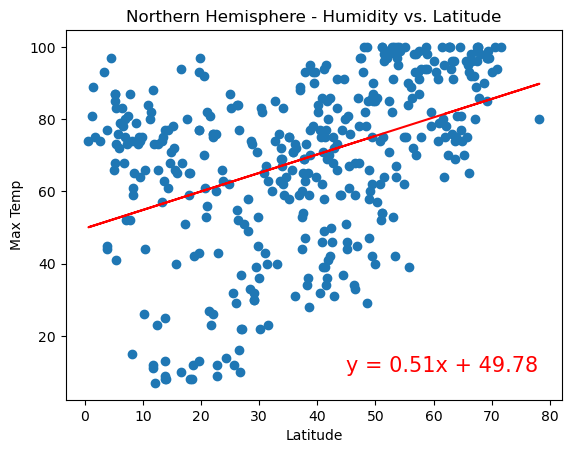

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
northern_x_values = northern_hemi_df["Lat"]  # Northern hemisphere latitudes
northern_y_values = northern_hemi_df["Humidity"]  # Corresponding humidity data
plot_linear_regression(northern_x_values, northern_y_values, 'Latitude', 'Humidity (%)',
                       'Northern Hemisphere - Humidity vs. Latitude', (45, 10))
                 

The r-squared is: 0.04


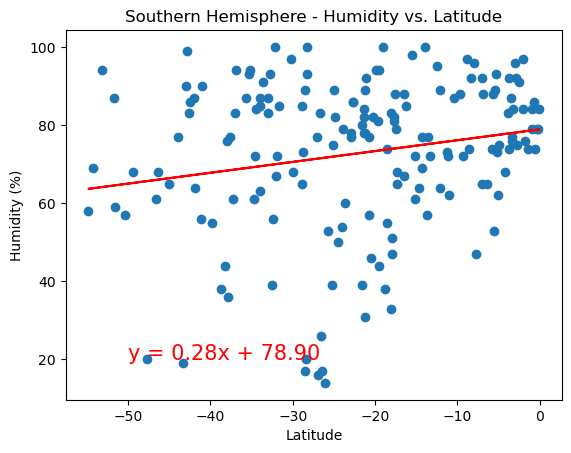

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Calculate the linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Variables for plotting
southern_x_values = southern_hemi_df["Lat"]  # Replace with your actual data
southern_y_values = southern_hemi_df["Humidity"]  # Replace with your actual data

# Call the function with the relevant parameters
plot_linear_regression(southern_x_values, southern_y_values,
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere - Humidity vs. Latitude',
                       (-50, 20))  # Adjust these coordinates as needed

**Discussion about the linear relationship:** YOUR RESPONSE HERE
the above plot is a scatter plot that describes the relationship between humidity and latitude in the Southern Hemisphere. it includes a linear relationship line. this model is between humidy vs latitude. the slope 0.28 is a positive indicating that as latitude increases the humidiy goes up.in other words as we go closer to equator the humidity also goes up. the y-intercept suggests that at the latitude of zero(equator) the model predicts a humidiy of 78.9 %

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04


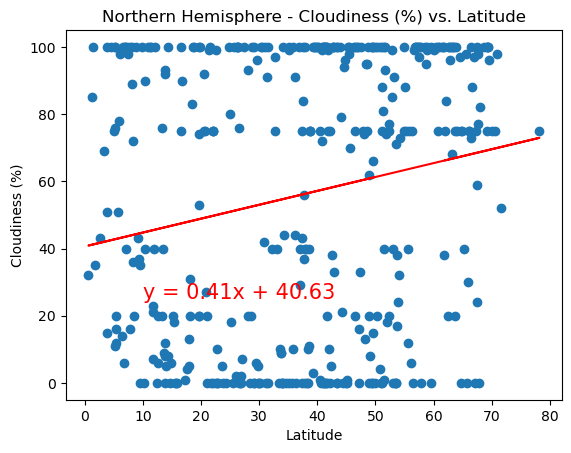

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Prepare the values for plotting
x_values = northern_hemi_df['Lat']  # Latitude
y_values = northern_hemi_df['Cloudiness']  # Cloudiness percentage

# Call the function with the relevant data
plot_linear_regression(x_values, y_values,
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude',
                       (10, 25))

The r-squared is: 0.06


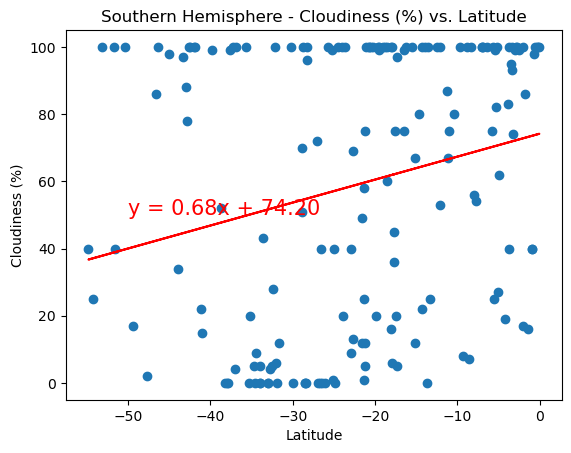

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Prepare the values for plotting
x_values = southern_hemi_df['Lat']  # Latitude
y_values = southern_hemi_df['Cloudiness']  # Cloudiness percentage

# Call the function with the relevant data
plot_linear_regression(x_values, y_values,
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude',
                       (-50, 50)) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

the above is a scatter plot for the Souther Hemispher Citis. it shows the relationship between cloudiness vs Latitude. there is a positive relationship between the two as one goes up the other goes to the same direction. the positive slope indicates that as we move closer to equator the cloudiness percentage tends to increase. y-inercept tells us that at the hyothetial zero point of latitude the model predicts the cloudiness to be 84.94%

### Wind Speed vs. Latitude Linear Regression Plot

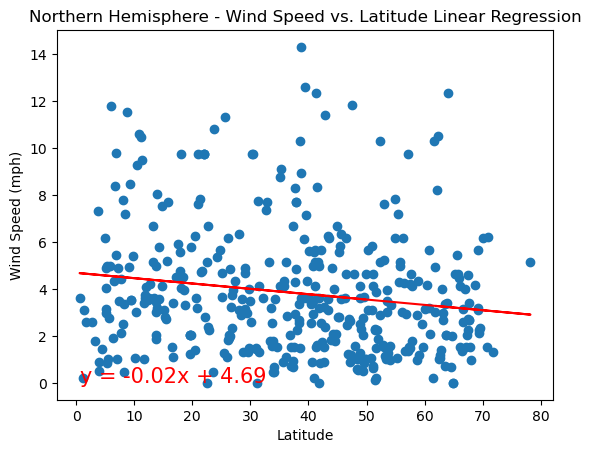

Slope: -0.02275862213227822
Intercept: 4.689189996493412
R-squared: 0.03


In [45]:
# Northern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Get the regression line equation components
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate regression line values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the scatter plot with the regression line equation
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Wind Speed'])), fontsize=15, color="red")

# Add title and labels
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Show the plot
plt.show()

# Print the slope, intercept, and r-squared value
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2:.2f}")


The r-squared is: 0.06
The line equation is: y = -0.05x + 2.94


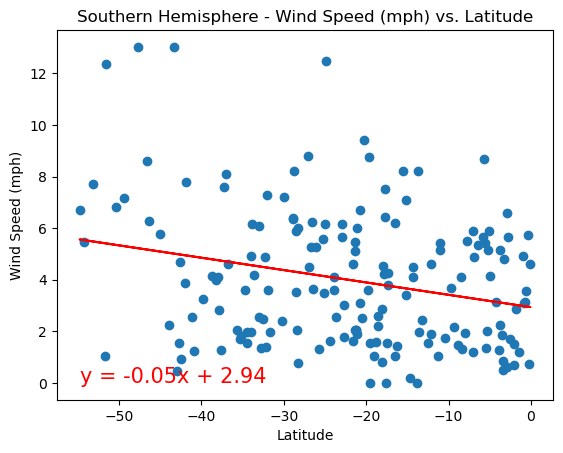

In [48]:
# Southern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get the equation of the line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Create the regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Wind Speed'])), fontsize=15, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print out the r squared value along with the line equation
print(f"The r-squared is: {r_value**2:.2f}")
print(f"The line equation is: {line_eq}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE:
the above scatter plot with linear regression line showing a relationship between windspeed and latitude. indeed there is a   negative relationship between windspeed and latitude and it does not imply a strong one.
for the y-intercept value of 2.94 suggests that the predicted wind speed at the equator (0 latitude) is 2.94.

